<a href="https://colab.research.google.com/github/Dhawaldwivedi/Loan-Prediction/blob/main/Logistic_Regression_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('/content/Loan Prediction Train Dataset.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# dropping loan_id - not required
df = df.drop(columns="Loan_ID")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
df.shape

(614, 12)

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
categorical_data = [i for i in df.columns if df[i].dtype=="object"]
categorical_data


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [18]:
numerical_data = [i for i in df.columns if df[i].dtype!="object"]
numerical_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Data Visualization

<Axes: xlabel='count', ylabel='Gender'>

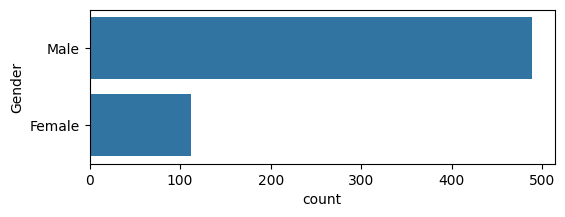

In [22]:
plt.figure(figsize=(6, 2))
sns.countplot(df['Gender'])


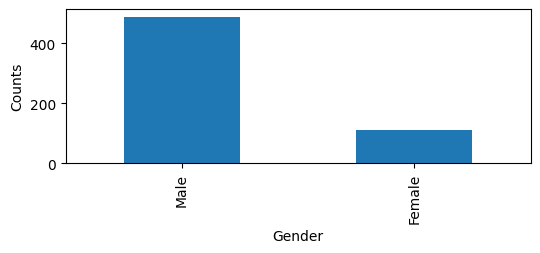

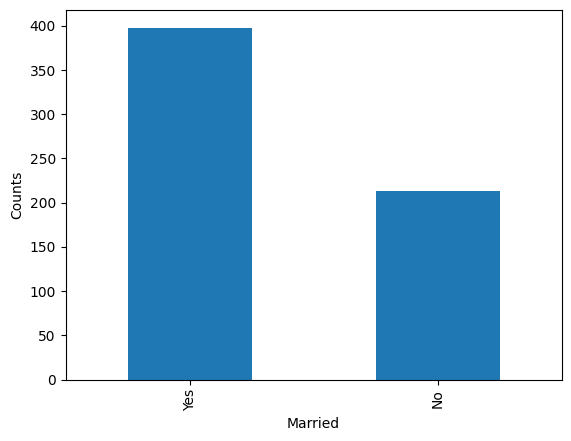

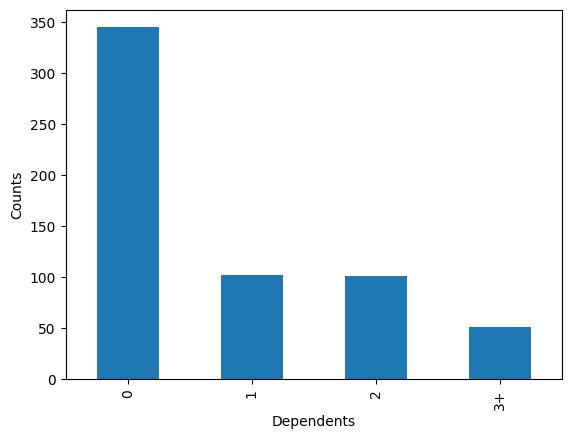

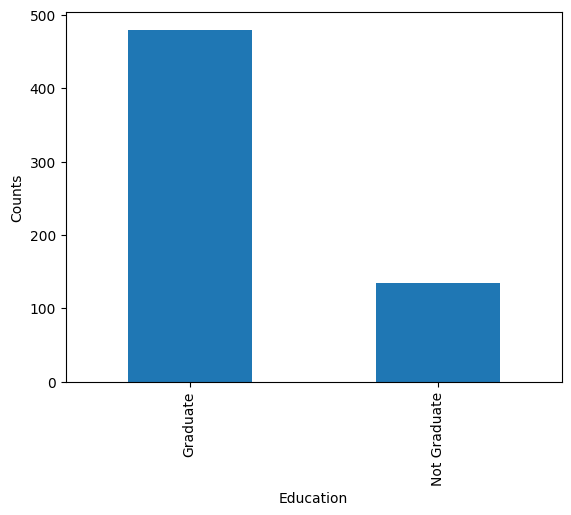

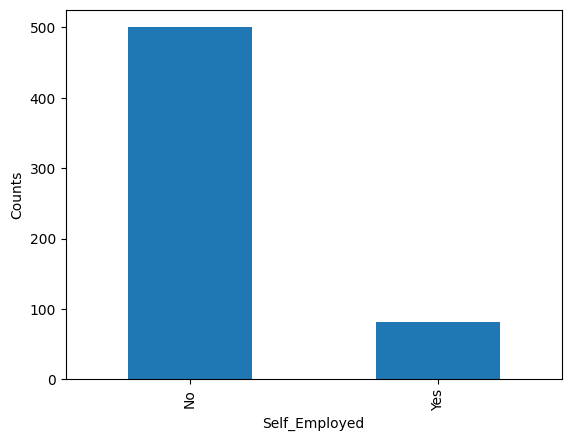

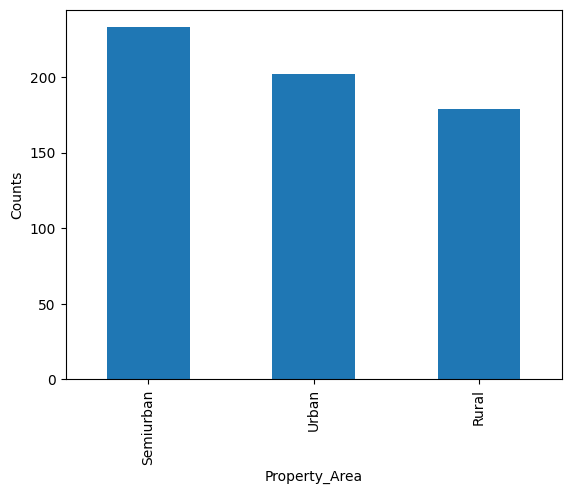

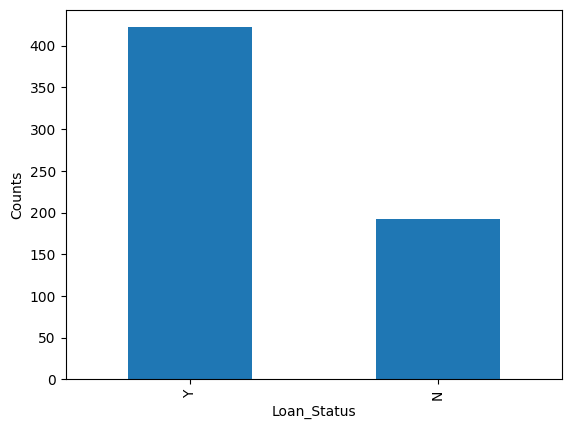

In [24]:
# For Categotical Data.
plt.figure(figsize=(6, 2))
for i in categorical_data:
    df[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

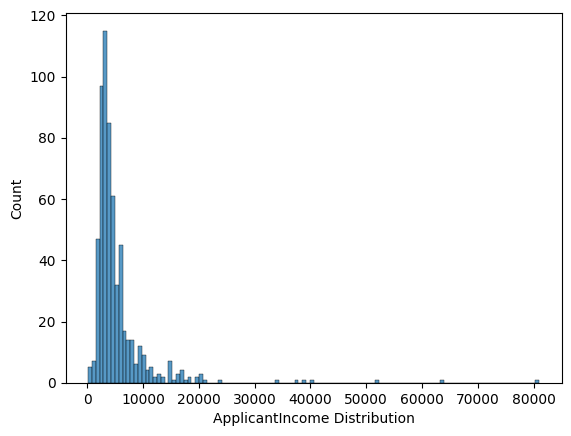

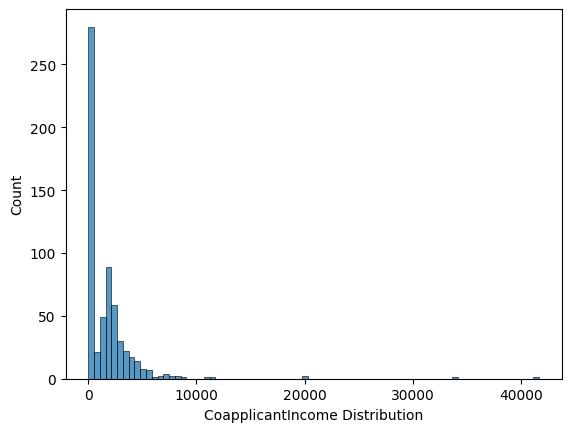

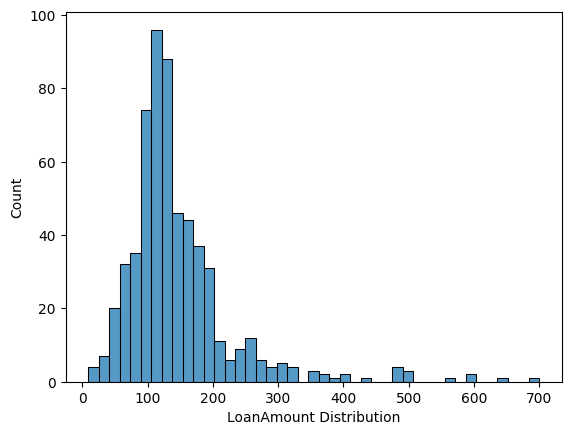

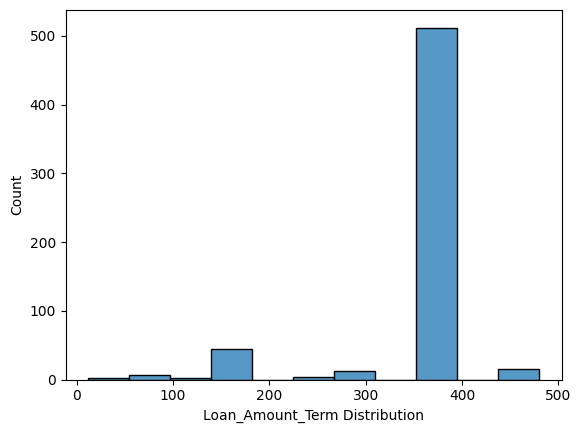

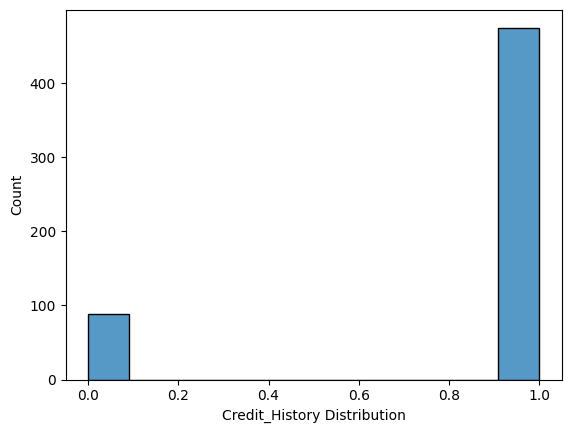

In [28]:
# For Continuous Numerical Data
for i in numerical_data:
    sns.histplot(df[i])
    plt.xlabel(i+" Distribution")
    plt.show()

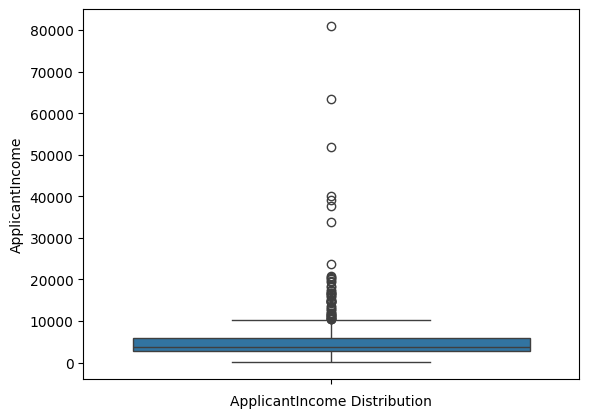

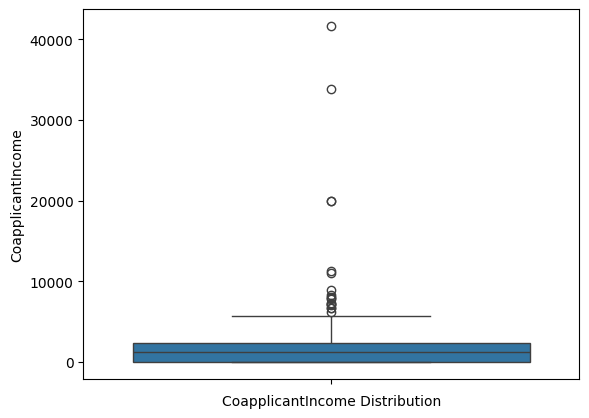

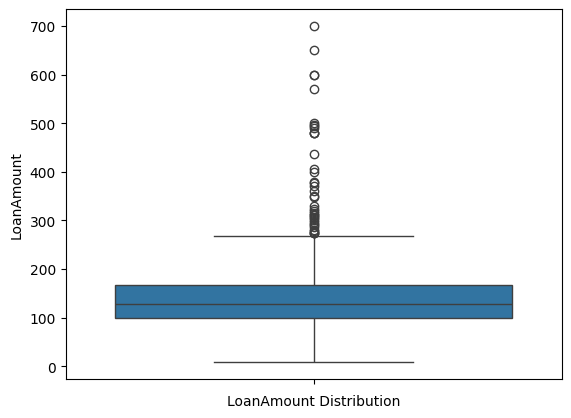

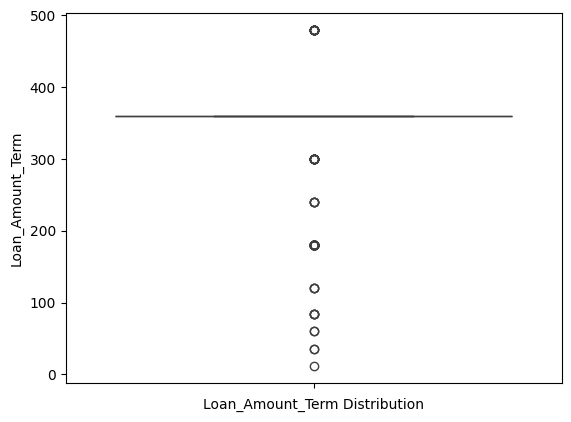

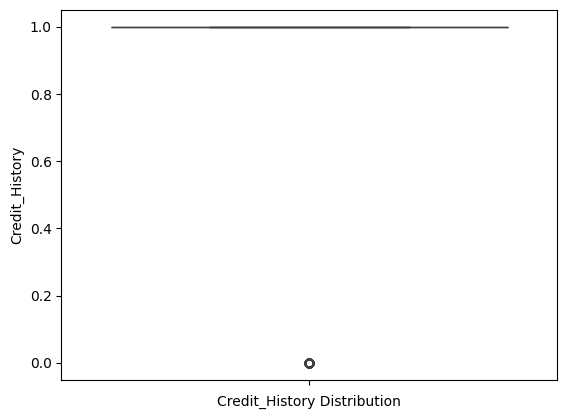

In [30]:
# For Continuous Numerical Data
for i in numerical_data:
    sns.boxplot(df[i])
    plt.xlabel(i+" Distribution")
    plt.show()

In [31]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [32]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [33]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [34]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [35]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [36]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [37]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [39]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [40]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


ValueError: could not convert string to float: 'Graduate'

In [44]:
# Select only the numerical columns
df_numerical = df[numerical_data]

# Calculate and display the correlation matrix
corr_matrix = df_numerical.corr()
display(corr_matrix)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<Axes: >

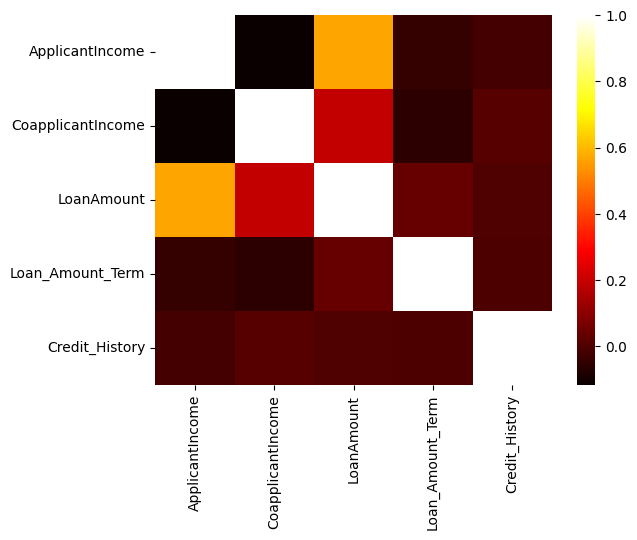

In [47]:
sns.heatmap(df_numerical.corr(),cmap='hot')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


# Feature Engineering

In [48]:
# We will encode the categorical data using label Encoder.
le = preprocessing.LabelEncoder()

for i in categorical_data:
    df[i] = le.fit_transform(df[i])

In [49]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [56]:
# If we want to apply log transformation for all the numerical variables, then majority of CoapplicantIncome values are 0.
# Hence we will create a new variable called TotalIncome = ApplicantIncome + CoapplicantIncome.

df["TotalIncome"] = df["ApplicantIncome"]+df["CoapplicantIncome"]

KeyError: 'ApplicantIncome'

In [54]:
df.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

KeyError: "['ApplicantIncome', 'CoapplicantIncome'] not found in axis"

In [55]:
numerical_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [57]:
numerical_data.remove("ApplicantIncome")
numerical_data.remove("CoapplicantIncome")
numerical_data.append("TotalIncome")

In [58]:
numerical_data

['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome']

In [59]:
# Log Transformation
for i in numerical_data+["Loan_Amount_Term"]:
    df[i] = np.log(df[i])

In [60]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,4.852030,1.772594,0.0,2,1,8.674026
1,1,1,1,0,0,4.852030,1.772594,0.0,0,0,8.714568
2,1,1,0,0,1,4.189655,1.772594,0.0,2,1,8.006368
3,1,1,0,1,0,4.787492,1.772594,0.0,2,1,8.505323
4,1,0,0,0,0,4.948760,1.772594,0.0,2,1,8.699515


# Model Building

In [71]:
# Splitting the data.
X,y = df.drop(columns = "Loan_Status"),df["Loan_Status"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
# Logistic Regression
model = LogisticRegression()

In [74]:
model.fit(X_train,y_train)

LogisticRegression()

In [65]:
# Check for infinite values in X_train
display(X_train.isin([np.inf, -np.inf]).sum())

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,54
Property_Area,0
TotalIncome,0


In [67]:
df['Credit_History'].value_counts()

,count
Credit_History,
0.0,525
-inf,89


In [68]:
df['Credit_History'] = df['Credit_History'].replace([np.inf, -np.inf], 1)

In [69]:
df['Credit_History'].value_counts()

,count
Credit_History,
0.0,525
1.0,89


In [75]:
print("Accuracy of Logistic Regression Model is ",model.score(X_test,y_test)*100)

Accuracy of Logistic Regression Model is  79.80295566502463


In [76]:
score = cross_val_score(model, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 80.9462881514061
